# 3.6 決定木学習
- 意味解釈可能性に配慮する場合に魅力的なモデルである。
- 一連の質問に基づいて決断を下すという方法により、データ分類するモデルである。
- 葉が純粋になるまで分割を繰り返すと多くのノードを持つ深い決定木になることがあり、過学習に陥りやすくなる。

# 3.6.1　情報利得の最大化：できるだけ高い効果を得る
- 分割毎に情報利得が最大となるように定式化した目的関数を定義する。
$$IG(D_{p},f) = I(D_{p})-\sum^{m}_{j=1} \frac{N_{j}}{N_{p}} I(D_{j})$$
- $f$は分割を行う特徴量、$D_{p}$は親のデータ・セット、$D_{j}$は$j$番目の子ノードのデータ・セット
- $I$は不純度を数値化したものである。ノードの不順度は異なるクラスのサンプルがどの程度の割合で混ざっているかを定量化する指標である。
- $N_{p}$は親ノードのサンプル総数、$N_{j}$は$j$番目の子ノードのサンプルの個数
- 情報利得は親ノードの不純度と子ノードの不純度の合計との差である。つまり、子ノードの不純度が低いほど、情報利得は大きくなる
- 以下二分決定木で話をすすめる

$$IG(D_{p},f) = I(D_{p}) - \frac{N_{left}}{N_{p}}I(D_{left})-\frac{N_{right}}{N_{p}}I(D_{right})$$

- 二分決定木でよく使用される不純度の指標または分割条件は、ジニ不純度$I_{G}$、エントロピー$I_{H}$、分類誤差$I_{E}$の３つである。
$$I_{H}(t) = -\sum^{c}_{i=1}p(i|t)log_{2}p(i|t)$$
- $p(i|t)$は、特定のノード$t$においてクラス$i$に属するサンプルの割合を表す。ノードのサンプルがすべて同じ場合は0
- エントロピーが最大になるのは、各クラスが一様に分布している時である。
- エントロピーは相互情報量（２つの確率の相互依存度）が最大化するように試みる条件である。？？？？

- ジニ不純度については、直感的に、誤分類の確率を最小化する条件であると解釈できる
$$I_{G}(t) = \sum^{c}_{i=1}p(i|t)(1-p(i|t))=1-\sum^{c}_{i=1}p(i|t)^{2}$$
- ジニ不純度が最大になるのは、クラスが完全に混合されている場合である。
- ジニ不純度とエントロピーは非常によく似た結果となるのが一般的であるため、異なる不純度で条件を使ってモデルを評価するのは時間の無駄である。

$$I_{E}(t)=1-max\{p(i|t)\}$$
- 分類誤差は剪定には役に立つが、ノードのクラス確率には鈍いため、決定木を成長させるのには適していない

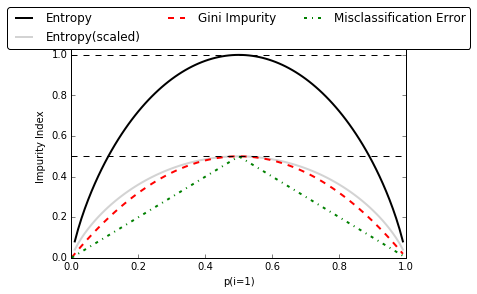

In [1]:
#３種類の不純度条件を視覚的に比較する
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#ジニ不純度の関数を定義
def gini(p):
    return (p) * (1 - (p)) + (1 - p)*(1 - (1 - p))

#エントロピーの関数を定義
def entropy(p):
    return -p*np.log2(p) - (1 - p) * np.log2((1 - p))

#分類誤差の関数を定義
def error(p):
    return 1 - np.max([p, 1-p])

#確率を表す配列の生成（0から0.99まで0.01刻み）
x = np.arange(0.0,1.0,0.01)
#配列の値をもとにエントロピー、分類誤差を計算
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent] #エントロピーに0.5かけたやつ
err = [error(i) for i in x]
#図の作成を開始
fig = plt.figure()
ax = plt.subplot(111)
#エントロピー（２種）、ジニ不純度、分類誤差のそれぞれをループ処理
for i,lab,ls,c, in zip([ent,sc_ent,gini(x),err],
                      ['Entropy','Entropy(scaled)','Gini Impurity','Misclassification Error'],
                      ['-','-','--','-.'],
                      ['black','lightgray','red','green']):
    line = ax.plot(x,i,label=lab,linestyle=ls,lw=2,color=c)

ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
#2本の水平の破線を引く
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
#横軸の上限/下限を設定
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

# 3.6.2 決定木の構築
- 決定木学習では、特徴空間を矩形に分割することで複雑な決定境界を構築できる。
- 決定木が深くなるほど決定境界は複雑になり、過学習に陥りやすくなる
- 決定木特有として、軸に平行な決定境界が得られる。

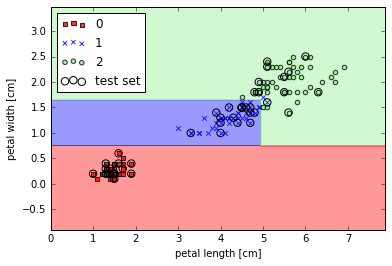

In [10]:
from sklearn.tree import DecisionTreeClassifier
#エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
#決定木のモデルにトレーニングデータを適合させる
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined,y_combined,classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [3]:
from sklearn import datasets
import numpy as np
#Irisデータをロード
iris = datasets.load_iris()
#特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

from sklearn.cross_validation import train_test_split
# トレーニングデータに分割する。
# 全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #yの種類分色を用意する
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測値結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #　グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #　軸の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    #テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')

- sklearnにはトレーニング後の決定木を.dotファイルでエクスポートできる機能がある。

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot')
feature_names = ['petal length','petal width']

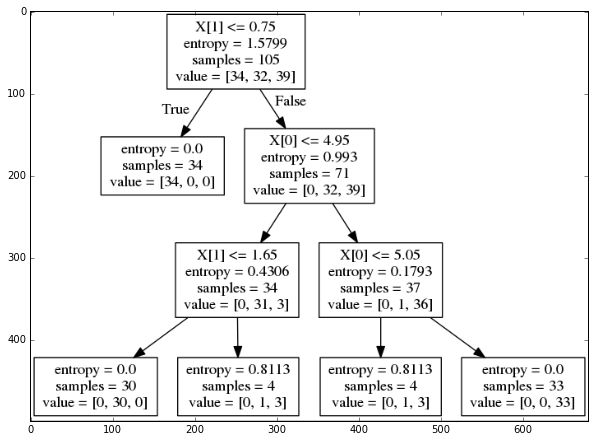

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
im = Image.open("tree.png", "r")
plt.imshow(np.array(im))

# 3.6.3 ランダムフォレストを使って弱い学習アルゴリズムと強い学習アルゴリズムを結合する
- ランダムフォレストは分類性能が高く、スケーラビリティに優れ、使いやすいことから、機械学習の応用において支持されている。
- 直感的には決定木のアンサンブルとみなすことができる
- アンサンブルの背後には、弱い学習アルゴリズムを組み合わせて、より頑健なモデルを構築するというものがある。
- 頑健なアルゴリズムには、汎化誤差が改善され、過学習に陥りにくいという特徴がある
- ランダムフォレストは以下の4つの単純なステップ

①トレーニングデータセットからn個のサンプルをランダムに選択する
②ブートストラップ標本から決定木を成長させる。各ノードから以下の作業を行う。
- d個の特徴量をランダムに非復元抽出する。一部の特徴量しか評価しない
- 例えば情報利得を最大化することにより、目的関数にしたがって最適な分割となる特徴量を使ってノードを分割する。
③スッテプ①、②をk回繰り返す
④決定木ごとの予測をまとめて、「多数決」に基づいてクラスラベルを割り当てる。

- ランダムフォレストに意味解釈可能性はない
- 配慮が必要なパラメータは、ランダムフォレストに対して選択する決定木の個数だけ。（③のk）
- ブートストラップ標本の大きさnと、特徴量の個数dは最適化できる
- nはトレーニングデータセットの個数、dは$\sqrt{m}$である。mはサンプルデータセットの特徴量の個数である。



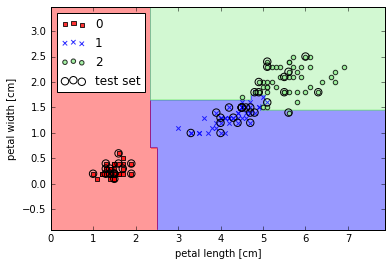

In [18]:
from sklearn.ensemble import RandomForestClassifier
#エントロピーを指標とするランダムフォレストのインスタンスを生成、10個の決定木を利用
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)#n_jobsで並列処理を指定
#ランダムフォレストのモデルにトレーニングデータを適合させる
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

- n_estimatorパラメータを使って10個の決定木からランダムフォレストをトレーニング
- 不純度の指標としてエントロピーの条件を使ってノードを分割